In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

In [2]:
loan_data_test = pd.read_csv('../datasets/bankrecords.csv')

In [3]:
loan_data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
del loan_data_test['Loan_ID']

In [5]:
loan_data_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
x_ins = loan_data_test.drop(columns =['Loan_Status'])
y_ins = loan_data_test['Loan_Status']

In [40]:
y_ins.shape

(614,)

In [7]:
x_ins

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [8]:
numerical_cols = x_ins.select_dtypes(include=np.number).columns.tolist()
categorical_cols = x_ins.select_dtypes('object').columns.tolist()

In [9]:
numerical_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
categorical_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
impute_ins = SimpleImputer(strategy='mean').fit(x_ins[numerical_cols])
impute_ins.transform(x_ins[numerical_cols])

array([[0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.46412162e+02,
        3.60000000e+02, 1.00000000e+00],
       [1.00000000e+00, 4.58300000e+03, 1.50800000e+03, 1.28000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 3.00000000e+03, 0.00000000e+00, 6.60000000e+01,
        3.60000000e+02, 1.00000000e+00],
       ...,
       [1.00000000e+00, 8.07200000e+03, 2.40000000e+02, 2.53000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [2.00000000e+00, 7.58300000e+03, 0.00000000e+00, 1.87000000e+02,
        3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 4.58300000e+03, 0.00000000e+00, 1.33000000e+02,
        3.60000000e+02, 0.00000000e+00]])

In [12]:
encode_ins = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(x_ins[categorical_cols])
cols_encode_ins = list(encode_ins.get_feature_names(categorical_cols))
loan_data_test[cols_encode_ins] = encode_ins.transform(x_ins[categorical_cols])

In [13]:
loan_data_test_inst = x_ins[numerical_cols + cols_encode_ins]

In [14]:
loan_data_test_inst.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Gender_nan', 'Married_No', 'Married_Yes', 'Married_nan',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Self_Employed_nan', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [15]:
loan_data_test_inst.isnull().sum()

Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Female               0
Gender_Male                 0
Gender_nan                  0
Married_No                  0
Married_Yes                 0
Married_nan                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Self_Employed_nan           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_N               0
Loan_Status_Y               0
dtype: int64

In [16]:
loan_missing_1 = loan_data_test_inst.LoanAmount.mean()
loan_data_test_inst.LoanAmount = loan_data_test_inst.LoanAmount.fillna(loan_missing_1)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
loan_missing_2 = loan_data_test_inst.Loan_Amount_Term.median()
loan_data_test_inst.Loan_Amount_Term = loan_data_test_inst.Loan_Amount_Term.fillna(loan_missing_2)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
loan_missing_3 = loan_data_test_inst.Dependents.median()
loan_data_test_inst.Dependents = loan_data_test_inst.Dependents.fillna(loan_missing_3)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
loan_missing_4 = loan_data_test_inst.Credit_History.median()
loan_data_test_inst.Credit_History = loan_data_test_inst.Credit_History.fillna(loan_missing_4)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
loan_data_test_inst.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Gender_nan                 0
Married_No                 0
Married_Yes                0
Married_nan                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Self_Employed_nan          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
dtype: int64

In [21]:
scale_inst =  StandardScaler().fit_transform(loan_data_test_inst)

In [22]:
loan_data_test_inst

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_nan,Married_No,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,6000,0.0,141.000000,360.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
610,3.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
611,1.0,8072,240.0,253.000000,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,2.0,7583,0.0,187.000000,360.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
del loan_data_test_inst['Loan_Status_N']

In [24]:
del loan_data_test_inst['Loan_Status_Y']


In [25]:
x = loan_data_test_inst

In [26]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,6000,0.0,141.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
610,3.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
611,1.0,8072,240.0,253.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,2.0,7583,0.0,187.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
y_ins.shape

(614,)

In [51]:
y_ins.isna().sum()

0

In [28]:
y = y_ins[:, np.newaxis]

<ipython-input-28-78e08f0a5962>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y_ins[:, np.newaxis]


In [29]:
ordinal_en = OrdinalEncoder()

ordinal_en.fit_transform(y)

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [53]:
y.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=30)

In [31]:
svm = SVC(kernel= 'linear', C=1, random_state=1 )
svm.fit(x_train, y_train)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, kernel='linear', random_state=1)

In [32]:
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = {:.1f}%'.format(accuracy*100))

Accuracy = 76.2%


In [33]:
confusion = confusion_matrix(y_test, y_pred)
scores = confusion.diagonal() / confusion.sum(axis = 1) * 100
print('Loan Status = 0: {:.2f}%'.format(scores[0]))
print('Loan Status = 1: {:.2f}%'.format(scores[1]))

Loan Status = 0: 33.33%
Loan Status = 1: 92.54%


<AxesSubplot:>

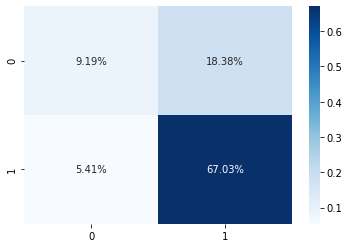

In [34]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.63      0.33      0.44        51
           Y       0.78      0.93      0.85       134

    accuracy                           0.76       185
   macro avg       0.71      0.63      0.64       185
weighted avg       0.74      0.76      0.74       185



In [36]:
mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

ValueError: could not convert string to float: 'Y'